# Linear Regression

Linear regression comes with a set of implicit assumptions:

* Linear regression works best when the **data is linear**
* Linear regression is **sensitive to outliers**

### Gradient Descent

Given a **prediction**

$$
\hat{y} = w_1 x + w_2
$$

and a **loss function** MAE or MSE.

MAE is **Mean Absolute Error**:

$$
\text{Error} = \text{E}(w_1, w_2) = \frac{1}{m} \sum_{i=1}^m |y - \hat{y}|
$$

MSE is **Mean Squared Error**:

$$
\text{Error} = \text{E}(w_1, w_2) = \frac{1}{2m} \sum_{i=1}^m (y - \hat{y})^2
$$

Then the **gradient descent step** calculates as

$$
w_i \to w_i + \alpha \cdot \frac{\partial}{\partial w_i} \text{Error}
$$

For MSE as **loss function** this is:

$$
\begin{aligned}
\frac{\partial}{\partial w_1} \text{Error} &= \frac{\partial \, \text{Error}}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial w_1} =  - \, \frac{1}{m} \sum_{i=1}^{m} (y - \hat{y}) \cdot x \\
\frac{\partial}{\partial w_2} \text{Error} &= \frac{\partial \, \text{Error}}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial w_2} =  - \, \frac{1}{m} \sum_{i=1}^{m} (y - \hat{y})
\end{aligned}
$$

### Types of Gradient Descent

**Stochastic Gradient Descent**: calculate loss and update weights for one point ($m = 1$), then do the same for the next point.

**Mini-batch Gradient Descent** split data into many small batches ($m > 1$). For each batch, calculate the sum of the losses and update the weights.

**Batch Gradient Descent**: calculate losses for all points ($m = M$), add them and update the weights.

### Implementation of Gradient Descent

In [207]:
import numpy as np
import matplotlib.pyplot as plt

In [401]:
data = np.loadtxt('linear-regression-data.csv', delimiter = ',')
X = data[:, :-1]
y = data[:, -1]

print(f'X is a matrix with shape {X.shape}. This allows to have multiple features')
print(f'y is a vector with shape {y.shape}')

X is a matrix with shape (100, 1). This allows to have multiple features
y is a vector with shape (100,)


In [402]:
def plot(X, y, regression_coef, title):
    X_min = X.min()
    X_max = X.max()
    counter = len(regression_coef)
    for W, b in regression_coef:
        counter -= 1
        color = [1 - 0.92 ** counter for _ in range(3)]
        plt.plot([X_min, X_max],[X_min * W + b, X_max * W + b], color = color)
    plt.title(title)
    plt.scatter(X, y, zorder = 3);

In [403]:
np.random.seed(42)
learn_rate = 0.005
num_iter = 25

def stochasticGradientDescent(X, y):
    W = np.zeros(X.shape[1])
    b = 0
    regression_coef = [np.hstack((W,b))]

    for _ in range(num_iter):
        W_ = 0
        b_ = 0
        for i in range(X.shape[0]):
            y_pred = X[i] * W + b
            error = y[i] - y_pred
            W_ += error * X[i] * learn_rate
            b_ += error * learn_rate
        W = W + W_
        b = b + b_
        regression_coef.append(np.hstack((W, b)))
    
    return regression_coef

def miniBatchGradientDescent(X, y, batch_size=20):
    W = np.zeros(X.shape[1])
    b = 0
    regression_coef = [np.hstack((W,b))]

    for _ in range(num_iter):
        batch = np.random.choice(range(X.shape[0]), batch_size)    # create a random mini-batch
        X_batch = X[batch,:]
        y_batch = y[batch]
        y_pred = np.matmul(X_batch, W) + b
        error = y_batch - y_pred
        W = W + learn_rate * np.matmul(error, X_batch)
        b = b + learn_rate * np.sum(error)
        regression_coef.append(np.hstack((W, b)))
    
    return regression_coef

def batchGradientDescent(X, y):
    W = np.zeros(X.shape[1])
    b = 0
    regression_coef = [np.hstack((W,b))]

    for _ in range(num_iter):
        y_pred = np.matmul(X, W) + b
        error = y - y_pred
        W = W + learn_rate * np.matmul(error, X)
        b = b + learn_rate * np.sum(error)
        regression_coef.append(np.hstack((W, b)))
    
    return regression_coef

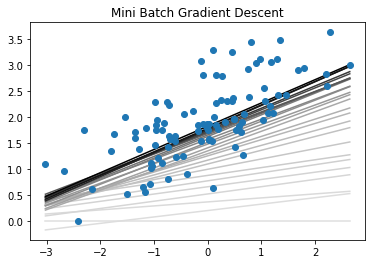

In [404]:
regression_coef = miniBatchGradientDescent(X, y, batch_size=20)
plot(X, y, regression_coef, 'Mini Batch Gradient Descent')

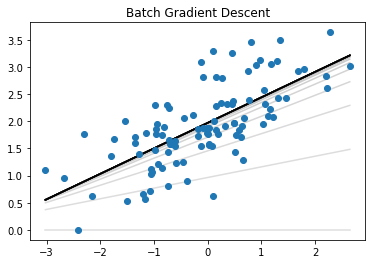

In [405]:
regression_coef = batchGradientDescent(X, y)
plot(X, y, regression_coef, 'Batch Gradient Descent')

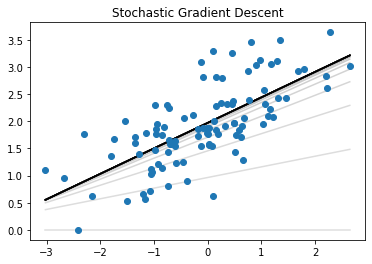

In [406]:
regression_coef = stochasticGradientDescent(X, y)
plot(X, y, regression_coef, 'Stochastic Gradient Descent')

## Linear Regression with SciKit-Learn

In [407]:
import pandas as pd
from sklearn.linear_model import LinearRegression

bmi_life_data = pd.read_csv('bmi_and_life_expectancy.csv', header=0)
bmi_life_data

,Country,Life expectancy,BMI
0,Afghanistan,52.8,20.62058
1,Albania,76.8,26.44657
2,Algeria,75.5,24.59620
3,Andorra,84.6,27.63048
4,Angola,56.7,22.25083
...,...,...,...
158,Vanuatu,63.4,26.78926
159,West Bank and Gaza,74.1,26.57750
160,Vietnam,74.1,20.91630
161,Zambia,51.1,20.68321


In [408]:
model = LinearRegression()
model.fit(bmi_life_data[['BMI']], bmi_life_data[['Life expectancy']])

laos_life_exp = model.predict([[21.07931]])
laos_life_exp

array([[60.31564716]])

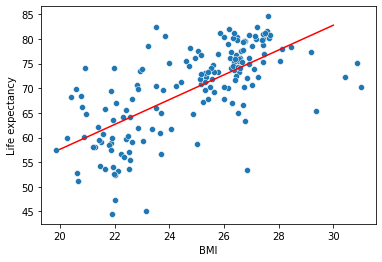

In [409]:
import matplotlib.pyplot as plt
sns.scatterplot(data=bmi_life_data, x='BMI', y='Life expectancy');
x = np.array([20,30])
y = lambda x: model.coef_ * x + model.intercept_
plt.plot(x, y(x)[0], color='r');

## Multiple Linear Regression

A **predictor** is an **independent variable** you're looking at in order to make predictions about other variables (BMI in the last example), while the values you are trying to predict are known as **dependent variables** (life expectancy in the last example)

In [410]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

# Load the data from the boston house-prices dataset 
import warnings
warnings.filterwarnings('ignore')
boston_data = load_boston()
x = boston_data['data']
y = boston_data['target']

# Make and fit the linear regression model
model = LinearRegression()
model.fit(x, y)

# Make a prediction using the model
sample_house = [[2.29690000e-01, 0.00000000e+00, 1.05900000e+01, 0.00000000e+00, 4.89000000e-01,
                6.32600000e+00, 5.25000000e+01, 4.35490000e+00, 4.00000000e+00, 2.77000000e+02,
                1.86000000e+01, 3.94870000e+02, 1.09700000e+01]]
prediction = model.predict(sample_house)
prediction

array([23.68284712])

## Closed Form Solution

#### One Feature

For linear regression with **one predictor** ($n = 1$), the weights $w_1$ and $w_2$ can also be determined mathematically by solving the equations

$$
\begin{aligned}
\frac{\partial}{\partial w_1} \text{E}(w_1, w_2) &= 0 \\
\frac{\partial}{\partial w_2} \text{E}(w_1, w_2) &= 0
\end{aligned}
$$

#### Multiple Features

For linear regression with **multiple features** ($n > 1$), we introduce the following notation.

The **matrix** $X$ contains the data where each **row** is one datapoint with $n$ features, and $x_0^{(i)} =1$ represents the **bias**:
 
$$
X = \begin{pmatrix}x_0^{(0)} & x_1^{(0)} & \cdots & x_n^{(0)} \\ x_0^{(1)} & x_1^{(1)} & \cdots & x_n^{(1)} \\ \vdots & \vdots & \ddots & \vdots \\ x_0^{(m)} & x_1^{(m)} & \cdots & x_n^{(m)} \end{pmatrix} = \begin{pmatrix}1 & x_1^{(0)} & \cdots & x_n^{(0)} \\ 1 & x_1^{(1)} & \cdots & x_n^{(1)} \\ \vdots & \vdots & \ddots & \vdots \\ 1 & x_1^{(m)} & \cdots & x_n^{(m)} \end{pmatrix}
$$

The **labels** are a **vector**

$$
y = 
\begin{pmatrix}
 y^{(1)} \\
 y^{(2)} \\
 \vdots \\
 y^{(m)} \\
\end{pmatrix}
$$

and the **weights** are a **matrix**

$$
W =
\begin{pmatrix}
 W_1 \\
 W_2 \\
 \vdots \\
 W_n \\
\end{pmatrix}
$$

Then the equation for the **mean square error** is the matrix product

$$
E(W) = \frac{1}{m} ((XW)^T - y^T) (XW - y)
$$

Since we need to minimize it, we can forget about the factor of $\frac{1}{m}$, so we get

$$
E(W) = W^TX^TXW - (XW)^Ty - y^T(XW) + y^Ty
$$

In the sum above, the second and the third terms are the same, since it's the inner product of two vectors, which means it's the sum of the products of its coordinates. 

Therefore,

$$
E(W) = W^TX^TXW - 2(XW)^Ty + y^Ty
$$

To minimize this, we need to take the derivative with respect to all values in the matrix WW. Using the chain rule, as we used above, we get the following:

$$
\frac{\partial{E}}{\partial{W}} = 2X^TXW - 2X^Ty
$$

And in order to set this equal to zero, we need

$$
X^TXW - X^Ty = 0
$$

or equivalently,

$$
W = (X^TX)^{-1} X^T y
$$

In [411]:
# example:

import numpy as np

x1 = np.array([3, 2])
x2 = np.array([5, 3])
x3 = np.array([6, 3])

X = np.array([[1, x1[0]], [1, x2[0]], [1, x3[0]]])
y = np.array([x1[1], x2[1], x3[1]])

W = np.linalg.inv(X.T @ X) @ X.T @ y
W

array([1.        , 0.35714286])

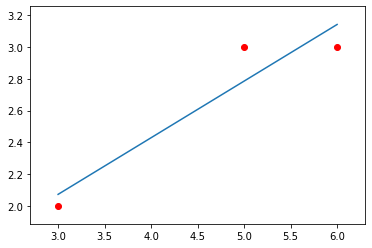

In [412]:
plt.scatter([x1[0], x2[0], x3[0]], [x1[1], x2[1], x3[1]], c='red')

p1 = np.min(X[:,1])
p2 = np.max(X[:,1])
plt.plot([p1, p2], [W[1] * p1 + W[0], W[1] * p2 + W[0]])
plt.margins(0.1, 0.1)

# Polynomial Regression